# Lab03: Hồi quy tuyến tính.

- MSSV: 18120061
- Họ và tên: Lê Nhựt Nam

## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Sau đó, tạo thư mục có tên `MSSV` của bạn (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) Chép file `Lab03-Clustering.ipynb` vào, rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

**Nội dung bài tập**

Bài tập 3 là bài tập cá nhân. Trong bài này, bạn sẽ cài đặt thuật toán học máy `Hồi quy tuyến tính`. 


### 1. Tập giả định

- Hồi quy tuyến tính là một mô hình **tuyến tính**, mô hình này giả định tồn tại một mối liên hệ tuyến tính giữa các biến đầu vào (x) và một biến đầu ra (y). Cụ thể hơn, y có thể được tính bằng một tổ hợp tuyến tính của các biến đầu vào (x).
- Một cách tổng quát, một mô hình tuyến tính dự đoán kết quả bằng cách tính tổng trọng số của các đặc trưng đầu vào (hay các biến độc lập). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ là giá trị dự đoán.
    - $n$ là số lượng đặc trưng.
    - $x_i$ là giá trị đặc trưng thứ $i$.
    - $w_j$ là tham số thứ $j$ của mô hình.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ **vector trọng số** của mô hình (bao gốm cả $w_0$ và các trọng số đặc trưng $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ là chuyển vị của $\mathbf{w}$ (vector hàng thay vì vector cột).
    - $\mathbf{x}$ là **vector đầu vào** của các mẫu dữ liệu, *bao gồm* $x_0$ đến $x_n$, với $x_0$ *luôn có giá trị là* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ là tích vô hướng của 2 vector $\mathbf{w}^T$ và $\mathbf{x}$.
    - $h_{\mathbf{w}}$ là hàm giả thiết, biểu diễn bằng các tham số $\mathbf{w}$.


### 2. Đánh giá hiệu suất và mục tiêu học

- Trước khi huấn luyện dữ liệu, ta cần phải đánh giá mô hình của chúng ta khớp với dữ liệu huấn luyện như thế nào. Cách đánh giá thường được sử dụng nhất là trung bình bình phương độ lỗi **MSE** (Mean Square Error) $\Rightarrow$ ta cần phải tìm $\mathbf{w}$ tối thiểu hóa MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE trên tập huấn luyện $\mathcal{D}_{train}$ ký hiệu $\left(\mathbf{X},\mathbf{y}\right)$ bao gồm m mẫu $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

- Để tìm $\mathbf{w}$ sao cho hàm lỗi MSE tối thiểu ta tìm điểm đạo hàm của MSE có giá trị 0. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger} \cdot \mathbf{X}^T \cdot \mathbf{y}$$
  - $\mathbf{\hat{w}}$ là giá trị của $\mathbf{w}$ để giảm thiểu độ lỗi. 
  - **Chú ý** $\mathbf{X}^T \cdot \mathbf{X}$ không phải luôn **khả nghịch**. $\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger}$ là nghịch đảo giả của $\left(\mathbf{X}^T \cdot \mathbf{X}\right)$ - trường hợp nghịch đảo tổng quát kể cả khi ma trận không vuông cũng như không khả nghịch.

### 3. Cài đặt

#### Import Library

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [21]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)
# Show X
print(X)

# Show y
print(y)

[[ 1.44113933]
 [ 1.12178587]
 [ 0.15214179]
 [ 0.45670841]
 [-0.02892347]
 [-1.20625081]
 [ 1.14541386]
 [-1.6470509 ]
 [-0.08142088]
 [-0.70172203]
 [-0.02043462]
 [-0.79318622]
 [ 0.57758861]
 [-0.53538305]
 [ 0.43720826]
 [ 1.35324242]
 [ 0.08710357]
 [ 1.19898286]
 [-0.03099917]
 [ 0.68227347]
 [-0.28834404]
 [ 0.37687323]
 [-0.11267706]
 [ 0.91602464]
 [-1.02554849]
 [-1.40587926]
 [ 0.19219676]
 [ 0.31112434]
 [-0.77743431]
 [ 0.71642783]
 [-0.52125373]
 [ 0.40611551]
 [-0.03817915]
 [-0.63148665]
 [-0.13695441]
 [ 0.26054986]
 [-0.8201941 ]
 [ 0.06939018]
 [ 0.62280924]
 [-0.04586667]
 [ 0.30764186]
 [ 1.30961855]
 [-0.69291236]
 [ 0.57277312]
 [-0.06434693]
 [ 0.47759298]
 [ 1.25301612]
 [ 0.86556237]
 [-1.03665361]
 [-0.24898461]
 [ 0.33443632]
 [ 1.21902255]
 [ 1.47935574]
 [-0.60696001]
 [ 0.17333442]
 [-0.71234068]
 [-0.30017162]
 [-0.65885408]
 [-0.6737566 ]
 [ 1.22455098]
 [ 2.28596888]
 [-0.52847466]
 [-0.00250468]
 [ 1.18748441]
 [-0.30611273]
 [-1.04336418]
 [-0.93217

#### Load and visualize data

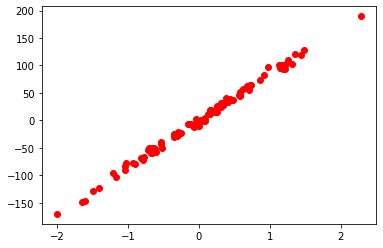

In [22]:
# Visualize data 
plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Nhận xét dữ liệu:
  Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:

#### Training function

In [39]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    #learning_rate = 1e-3
    #n_steps = 10000
       
    # random initialization of the model weights
    #w = np.random.rand((X.shape[1]))
        
    # iteratively updating W for n_steps
    #for i in range(n_steps):
    #  w = w - learning_rate * (2/X.shape[0] * np.dot(X.T, (np.dot(X, w) - y)))
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return w

In [37]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = np.c_[np.ones(X.shape[0]), X]
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)
print(one_added_X)
print(y)


one_added_X.shape = (100, 2)
y.shape = (100,)
[[ 1.          1.44113933]
 [ 1.          1.12178587]
 [ 1.          0.15214179]
 [ 1.          0.45670841]
 [ 1.         -0.02892347]
 [ 1.         -1.20625081]
 [ 1.          1.14541386]
 [ 1.         -1.6470509 ]
 [ 1.         -0.08142088]
 [ 1.         -0.70172203]
 [ 1.         -0.02043462]
 [ 1.         -0.79318622]
 [ 1.          0.57758861]
 [ 1.         -0.53538305]
 [ 1.          0.43720826]
 [ 1.          1.35324242]
 [ 1.          0.08710357]
 [ 1.          1.19898286]
 [ 1.         -0.03099917]
 [ 1.          0.68227347]
 [ 1.         -0.28834404]
 [ 1.          0.37687323]
 [ 1.         -0.11267706]
 [ 1.          0.91602464]
 [ 1.         -1.02554849]
 [ 1.         -1.40587926]
 [ 1.          0.19219676]
 [ 1.          0.31112434]
 [ 1.         -0.77743431]
 [ 1.          0.71642783]
 [ 1.         -0.52125373]
 [ 1.          0.40611551]
 [ 1.         -0.03817915]
 [ 1.         -0.63148665]
 [ 1.         -0.13695441]
 [ 1.    

#### Train our model and visualize result

[ 0.2006602  84.95437778]


(-2.216498822190719, 2.500372098805392)

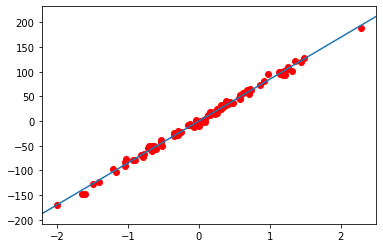

In [40]:
w = train_linear_regression(one_added_X, y)
print(w)
# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones_added_xs =  np.c_[np.ones(xs.shape[0]), xs]

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




Tính MSE

In [26]:
w_0 = w[0]
print('w0 = {0}'.format(w_0))
w_1 = w[1]
print('w1 = {0}'.format(w_1))
predicted_y = y * w_0 + w_1

mse = (np.square(y - predicted_y)).mean(axis=0)
print('MSE = {0}'.format(mse / len(y)))

w0 = 0.2006602044127579
w1 = 84.95437778408845
MSE = 97.4196323608868


- **TODO**: Điểm mạnh và điểm yếu của `Hồi quy tuyến tính`:

Điểm mạnh:
 - Mô hình đơn giản: Mô hình hồi quy tuyến tính là phương trình đơn giản nhất sử dụng để biểu diễn mối quan hệ giữa nhiều biến dự báo và biến dự đoán.
 - Hiệu quả về mặt tính toán: Tốc độ lập mô hình của hồi quy tuyến tính nhanh vì nó không yêu cầu tính toán phức tạp và chạy dự đoán nhanh khi lượng dữ liệu lớn.
 - Khả năng diễn giải của đầu ra: Diễn giải được ảnh hưởng tương đối của một hoặc nhiều biến dự báo đến giá trị dự đoán khi các yếu tố dự báo độc lập với nhau. Có thể thể hiện sự thay đổi nào trong biến dự báo gây ra thay đổi nào trong biến dự đoán hoặc biến mục tiêu

Điểm yếu:
 - Quá đơn giản: Mô hình hồi quy tuyến tính quá đơn giản để nắm bắt được độ phức tạp của thế giới thực.
 - Giả định tuyến tính: Hồi quy tuyến tính đưa ra giả định mạnh mẽ rằng có các biến Dự đoán (độc lập) và Dự đoán (phụ thuộc) có quan hệ tuyến tính với nhau, điều này không hợp lý, vì trong thế giới thực, có rất nhiều mối quan hệ không có sự phự thuộc tuyến tính (phụ thuộc phi tuyến).
 - Bị ảnh hưởng nghiêm trọng bởi các điểm ngoại lệ: Các điểm ngoại lệ có thể có ảnh hưởng lớn đến kết quả đầu ra.
 - Tính độc lập của các biến: Giả định rằng các biến dự báo không tương quan với nhau, điều này hiếm (hoặc không có) trong thực tế.
 - Hồi quy tuyến tính xem xét mối quan hệ giữa giá trị trung bình của biến dự đoán/ phụ thuộc và các biến dự đoán/ độc lập và giả định phương sai không đổi xung quanh giá trị trung bình.
